In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

mu_b = 3
sigma_b = 0.5

def h(x, y, N):
    return np.exp(-x-y) * (x+y)**N

xmin = 0
xmax = 20
npoints = 400
ntoys = 10**4
xvals = np.linspace(xmin, xmax, npoints+1)
fvals = np.zeros(npoints+1)
N = 5
for idx, x in enumerate(xvals):
    y = rand.normal(mu_b, sigma_b, ntoys)
    y = y[y>0]
    ftoy = h(x, y, N)
    fvals[idx] = (1/float(len(y)))*ftoy.sum()

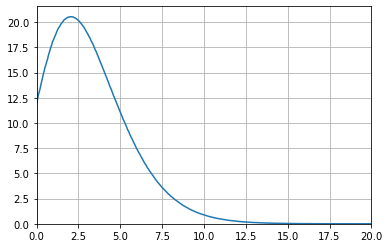

In [3]:
fig, ax = plt.subplots()
ax.plot(xvals, fvals)
ax.set_xlim(xmin, xmax)
ax.set_ylim(0)
ax.grid(True, which='both')

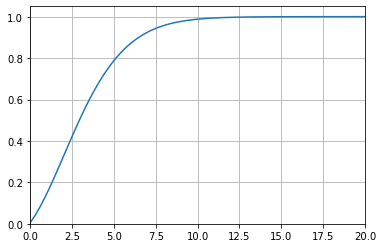

In [4]:
total = fvals.sum()
cumuls = (1/total) * fvals.cumsum()
fig2, ax2 = plt.subplots()
ax2.plot(xvals, cumuls)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0)
ax2.grid(True, which='both')

In [10]:
threshold = 0.95

indices = np.nonzero(cumuls>threshold)
i95 = np.min(indices)

#95% CL limit is in between xvals[i95-1] and xvals[i95]
dx = xvals[i95] - xvals[i95-1]
dcumul = cumuls[i95] - cumuls[i95-1]
lim = xvals[i95-1] + dx*(threshold-cumuls[i95-1]) / dcumul
print('95%% Bayesian CL is %5.2f' % lim)

95% Bayesian CL is  7.71
